In [ ]:
!pip install bert_embedding

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 13.8 MB 5.3 MB/s 
     |████████████████████████████████| 29.6 MB 2.7 MB/s 
     |████████████████████████████████| 209 kB 39.0 MB/s 
  Created wheel for gluonnlp: filename=gluonnlp-0.6.0-py3-none-any.whl size=259930 sha256=68429313d0bd638b41fe379e0f206c8b19856415f1c707536096258089fcc64f
  Stored in directory: /root/.cache/pip/wheels/a6/41/8f/45bd1c58055d87aee5a71b6756a427ea8d92e506b3a9d17370
Successfully built gluonnlp
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.6
    Uninstalling numpy-1.21.6:
      Successfully uninstalled numpy-1.21.6
  Attempting uninstall: graphviz
    Found existing installation: graphviz 0.10.1
    Uninstalling graphviz-0.10.1:
      Successfully uninstalled graphviz-0.10.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour i

In [ ]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.3 MB 5.3 MB/s 
     |████████████████████████████████| 7.6 MB 45.0 MB/s 
     |████████████████████████████████| 163 kB 37.7 MB/s 
     |████████████████████████████████| 15.7 MB 33.4 MB/s 
  Attempting uninstall: numpy
    Found existing installation: numpy 1.14.6
    Uninstalling numpy-1.14.6:
      Successfully uninstalled numpy-1.14.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
mxnet 1.4.0 requires numpy<1.15.0,>=1.8.2, but you have numpy 1.21.6 which is incompatible.
bert-embedding 1.0.1 requires numpy==1.14.6, but you have numpy 1.21.6 which is incompatible.


In [ ]:
!pip install torchvision 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import bert_embedding
from bert_embedding import BertEmbedding
bert_embedding=BertEmbedding()

Vocab file is not found. Downloading.


In [ ]:
from transformers import BertModel, BertTokenizer
model_name = 'bert-base-uncased'

tokenizer = BertTokenizer.from_pretrained(model_name)
# load
model = BertModel.from_pretrained(model_name)

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
import torch
import torchvision
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

actions = pd.read_excel('/content/drive/MyDrive/behavioral_data/tools&actionfeatures_pt_eng.xlsx')
features = pd.read_excel('/content/drive/MyDrive/behavioral_data/tools&features_pt_eng2.xlsx')

In [ ]:
lOfObjects = []
for e in list(features['Object Name'].unique()):
  lOfWord = []
  if str(e) != 'nan':
    for k in e.split('_'):
      if '/' in k :
        lOfWord.append(k.split('/')[0].lower().strip())
      else:
        lOfWord.append(k.lower().strip())
    lOfObjects.append(lOfWord)

In [ ]:
import numpy as np

# the preprocessed list of objects
def unique(list1):
    x = np.array(list1, dtype=object)

    return list(np.unique(x))
  
lOfObjects = unique(lOfObjects)

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
import itertools

In [ ]:
from scipy.stats import zscore

def RDM(resp):
  """Compute the representational dissimilarity matrix (RDM)
  Args:
    resp (ndarray): S x N matrix with population responses to
      each stimulus in each row
  Returns:
    ndarray: S x S representational dissimilarity matrix
  """

  # z-score responses to each stimulus
  zresp = zscore(resp, axis=1)

  # Compute RDM
  RDM = 1 - (zresp @ zresp.T) / zresp.shape[1]

  return RDM

In [ ]:
portDict = {}
port = [ 
 'abre_caricas',
 'afia-lapis',
 'agrafador',
 'agulha',
 'alicate',
 'apagador',
 'apito',
 'balde',
 'batedeira',
 'berbequim',
 'boia',
 'bola_basquete',
 'borracha',
 'borrifador',
 'broca',
 'buzina',
 'cabide',
 'cana_pesca',
 'canivete',
 'carimbo',
 'carrinho_compras',
 'castical',
 'chave',
 'chave_inglesa',
 'chavena',
 'clip',
 'colher',
 'colher_pau',
 'copo',
 'corta_unhas',
 'dardo',
 'descascador',
 'desentupidor',
 'enxada',
 'escova_cabelo',
 'escova_dentes',
 'esfregona',
 'esponja',
 'espremedor',
 'faca',
 'fosforo',
 'furador',
 'garfo',
 'garrafa',
 'guardanapo',
 'isqueiro',
 'jarro',
 'lanterna',
 'lapis',
 'leque',
 'lima',
 'lupa',
 'manipulo_da_porta',
 'maquina_de_barbear',
 'martelo',
 'moedor_pimenta',
 'mola_roupa',
 'pa',
 'parafuso',
 'peso',
 'piao',
 'pinca',
 'pincel',
 'prego',
 'quebra_nozes',
 'ralador',
 'raquete',
 'rato_pc',
 'remo',
 'rolha',
 'rolo_massa',
 'saco_pasteleiro',
 'secador',
 'seringa',
 'taco_golfe',
 'tampa_garrafa',
 'tesoura',
 'tigela',
 'varinha_magica',
 'vassoura']
eng = ['opener_bottle',
 'pencil_sharpener',
 'stapler',
 'needle',
 'pliers',
 'board_eraser',
 'whistle',
 'bucket',
 'manual_mixer',
 'drill',
 'life_buoy',
 'ball_of_basket',
 'pencil_eraser',
 'spray_bottle',
 'drill_bit',
 'horn',
 'hanger',
 'fishing_rod',
 'swiss_knife',
 'ruber_stamp',
 'shopping_cart',
 'candlestick',
 'key',
 'wrench',
 'cup',
 'paper_clip',
 'Spoon',
 'wooden_spoon',
 'glass',
 'nail_clipper',
 'dart',
 'peeler',
 'plunger',
 'hoe',
 'hairbrush',
 'toothbrush',
 'mop',
 'sponge',
 'squeezer',
 'Knife',
 'match',
 'hole_punch',
 'fork',
 'bottle',
 'napkin',
 'lighter',
 'jug',
 'flashlight',
 'pencil',
 'hand_fan',
 'nail_file',
 'magnifier',
 'door_handle',
 'electric_shaver',
 'hammer',
 'pepper_grinder',
 'clothespin',
 'shovel',
 'screw',
 'Weight',
 'spinning_top',
 'tweezers',
 'brush',
 'nail',
 'nutcracker',
 'grater',
 'racquet',
 'computer_mouse',
 'paddle',
 'cork',
 'rolling_pin',
 'piping_bag',
 'dryer',
 'syringe',
 'golf_club',
 'bottle_cap',
 'scissors',
 'bowl',
 'hand_blender',
 'broom']

portDict = dict(zip(eng, port))

In [ ]:
features['Portuguese ObjNam'] = features['Object Name'] 
features = features.replace({"Portuguese ObjNam" : portDict})

In [ ]:
features = features.sort_values(by=['Portuguese ObjNam'])
features.head()

,Object Name,Portuguese feature,English feature,Production frequency,Category,Concept per Feature (CPF),Disting,Distinct,Portuguese ObjNam
1331,opener_bottle,usa-se/agarra-se_com_as_mãos,used/held_with_your_hands,28.0,action,77.0,ND,0.012987,abre_caricas
1320,opener_bottle,encaixa_na_carica,fits_on_bottle_caps,8.0,encyclopaedic??,1.0,D,1.000000,abre_caricas
1321,opener_bottle,encontra-se_em_bares,found_in_bars,7.0,encyclopaedic,1.0,D,1.000000,abre_caricas
1322,opener_bottle,encontra-se_em_cafés,found_in_cafes,7.0,encyclopaedic,1.0,D,1.000000,abre_caricas
1323,opener_bottle,encontra-se_em_cozinhas,found_in_kitchens,23.0,encyclopaedic,25.0,ND,0.040000,abre_caricas


In [130]:
SimDisObjPort = []
counter = 1
for subset in itertools.permutations(list(features['Object Name'].unique()), 2):
  if counter%100 == 0: 
    print(counter)
  counter += 1
  if str(subset[0]) != 'nan' and str(subset[1]) != 'nan' \
  and subset[0] != 'pencil ' and subset[1] != 'pencil ' and subset[0] != 'scissors ' and subset[1] != 'scissors ':
    dictOfSimDis = {}
    if '/' in subset[0]:  
      dictOfSimDis['obj1'] = subset[0].split('/')[0].lower().strip().split('_')
      dictOfSimDis['obj2'] = subset[1].lower().strip().split('_')

      obj1 = tokenizer.encode(dictOfSimDis['obj1'], add_special_tokens=True)
      obj1 = torch.tensor([obj1])
      with torch.no_grad():
        lhs1 = model(obj1)[0] # Models outputs are now tuples
        lhs1 = lhs1.mean(1)

      obj2 = tokenizer.encode(dictOfSimDis['obj2'], add_special_tokens=True)
      obj2 = torch.tensor([obj2])
      with torch.no_grad():
        lhs2 = model(obj2)[0] # Models outputs are now tuples
        lhs2 = lhs2.mean(1)

      dictOfSimDis['dissim'] = 1 - cosine_similarity(lhs1,lhs2)
    elif '/' in subset[1]:
      dictOfSimDis['obj1'] = subset[0].lower().strip().split('_')
      dictOfSimDis['obj2'] = subset[1].split('/')[0].lower().strip().split('_')

      obj1 = tokenizer.encode(dictOfSimDis['obj1'], add_special_tokens=True)
      obj1 = torch.tensor([obj1])
      with torch.no_grad():
        lhs1 = model(obj1)[0] # Models outputs are now tuples
        lhs1 = lhs1.mean(1)

      obj2 = tokenizer.encode(dictOfSimDis['obj2'], add_special_tokens=True)
      obj2 = torch.tensor([obj2])
      with torch.no_grad():
        lhs2 = model(obj2)[0] # Models outputs are now tuples
        lhs2 = lhs2.mean(1)

      dictOfSimDis['dissim'] = 1 - cosine_similarity(lhs1,lhs2)
    else:
      dictOfSimDis['obj1'] = subset[0].lower().strip().split('_')
      dictOfSimDis['obj2'] = subset[1].lower().strip().split('_')

      obj1 = tokenizer.encode(dictOfSimDis['obj1'], add_special_tokens=True)
      obj1 = torch.tensor([obj1])
      with torch.no_grad():
        lhs1 = model(obj1)[0] # Models outputs are now tuples
        lhs1 = lhs1.mean(1)

      obj2 = tokenizer.encode(dictOfSimDis['obj2'], add_special_tokens=True)
      obj2 = torch.tensor([obj2])
      with torch.no_grad():
        lhs2 = model(obj2)[0] # Models outputs are now tuples
        lhs2 = lhs2.mean(1)

      dictOfSimDis['dissim'] = 1 - cosine_similarity(lhs1,lhs2)

    EngFeat1 = features[features['Object Name'] == subset[0]]['English feature '].unique()
    EngFeat2 = features[features['Object Name'] == subset[1]]['English feature '].unique()
    dissimilarities1 = list(set(EngFeat1) - set(EngFeat2))
    dissimilarities2 = list(set(EngFeat2) - set(EngFeat1))
    similarities = list(set(EngFeat1) & set(EngFeat2))
    lenDis1 = len(dissimilarities1)
    lenDis2 = len(dissimilarities2)
    lenSim = len(similarities)

    dictOfSimDis['dis1'] = dissimilarities1
    dictOfSimDis['dis2'] = dissimilarities2
    dictOfSimDis['sim'] = similarities
    dictOfSimDis['lenDis1'] = lenDis1
    dictOfSimDis['lenDis2'] = lenDis2
    dictOfSimDis['lenSim'] = lenSim
    dictOfSimDis['portName1'] = features[features['Object Name'] == subset[0]]['Portuguese ObjNam'].unique()
    dictOfSimDis['portName2'] = features[features['Object Name'] == subset[1]]['Portuguese ObjNam'].unique()

    SimDisObjPort.append(dictOfSimDis)

100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600


In [133]:
import pickle
with open('/content/drive/MyDrive/behavioral_data/SimDisObjPortBert.pickle', 'wb') as fout:
    pickle.dump(SimDisObjPort, fout)

In [134]:
sortedList = [x.lower().strip().split('_') for _, x in sorted(zip(port, eng))]

In [ ]:
len(sortedList)

80

In [ ]:
DisFeat = np.empty([len(sortedList), len(sortedList)])

i = 0
j = 0
for e in sortedList:
  for item in SimDisObjPort:
    if i == j:
        DisFeat[i, j] = 0 
        j = j + 1
    elif item['obj1'] == e:
        DisFeat[i, j] = 1 - (item['lenSim'] / (item['lenSim'] + item['lenDis1'] + item['lenDis2']))
        j = j + 1
  j = 0
  i = i + 1

In [135]:
DisBert = np.empty([len(sortedList), len(sortedList)])

i = 0
j = 0
for e in sortedList:
  for item in SimDisObjPort:
    if i == j:
        DisBert[i, j] = 0 
        j = j + 1
    elif item['obj1'] == e:
      # dictOfSimDis['obj1'] = subset[0].split('/')[0].lower().strip().split('_')
      # dictOfSimDis['obj2'] = subset[1].lower().strip().split('_')

      obj1 = tokenizer.encode(item['obj1'], add_special_tokens=True)
      obj1 = torch.tensor([obj1])
      with torch.no_grad():
        lhs1 = model(obj1)[0] # Models outputs are now tuples
        lhs1 = lhs1.mean(1)

      obj2 = tokenizer.encode(item['obj2'], add_special_tokens=True)
      obj2 = torch.tensor([obj2])
      with torch.no_grad():
        lhs2 = model(obj2)[0] # Models outputs are now tuples
        lhs2 = lhs2.mean(1)
        
      DisBert[i, j] = 1 - cosine_similarity(lhs1,lhs2)
      j = j + 1
  
  j = 0
  i = i + 1

In [ ]:
from scipy.stats import spearmanr

def RSA_spearman(rdm1,rdm2):
    """
    computes and returns the spearman correlation between lower triangular 
    part of the input rdms. We only need to compare either lower or upper 
    triangular part of the matrix as RDM is symmetric
    """
    # get lower triangular part of the RDM1 
    lt_rdm1 = get_lowertriangular(rdm1)
    # get lower triangular part of the RDM1 
    lt_rdm2 = get_lowertriangular(rdm2)
    # return Spearman's correlation between lower triangular part of rdm1 & rdm2
    return spearmanr(lt_rdm1, lt_rdm2)[0]

def get_lowertriangular(rdm):
    """
    returns lower triangular part of the matrix
    """
    num_conditions = rdm.shape[0]
    return rdm[np.tril_indices(num_conditions,-1)]

In [136]:
RSA_spearman(DisBert, DisFeat)

0.09432708733096783

In [ ]:
from scipy.stats import zscore

def RDM(resp):
  """Compute the representational dissimilarity matrix (RDM)
  Args:
    resp (ndarray): S x N matrix with population responses to
      each stimulus in each row
  Returns:
    ndarray: S x S representational dissimilarity matrix
  """

  # z-score responses to each stimulus
  zresp = zscore(resp, axis=1)

  # Compute RDM
  RDM = 1 - (zresp @ zresp.T) / zresp.shape[1]

  return RDM

In [ ]:
DisBert.shape

(80, 80)

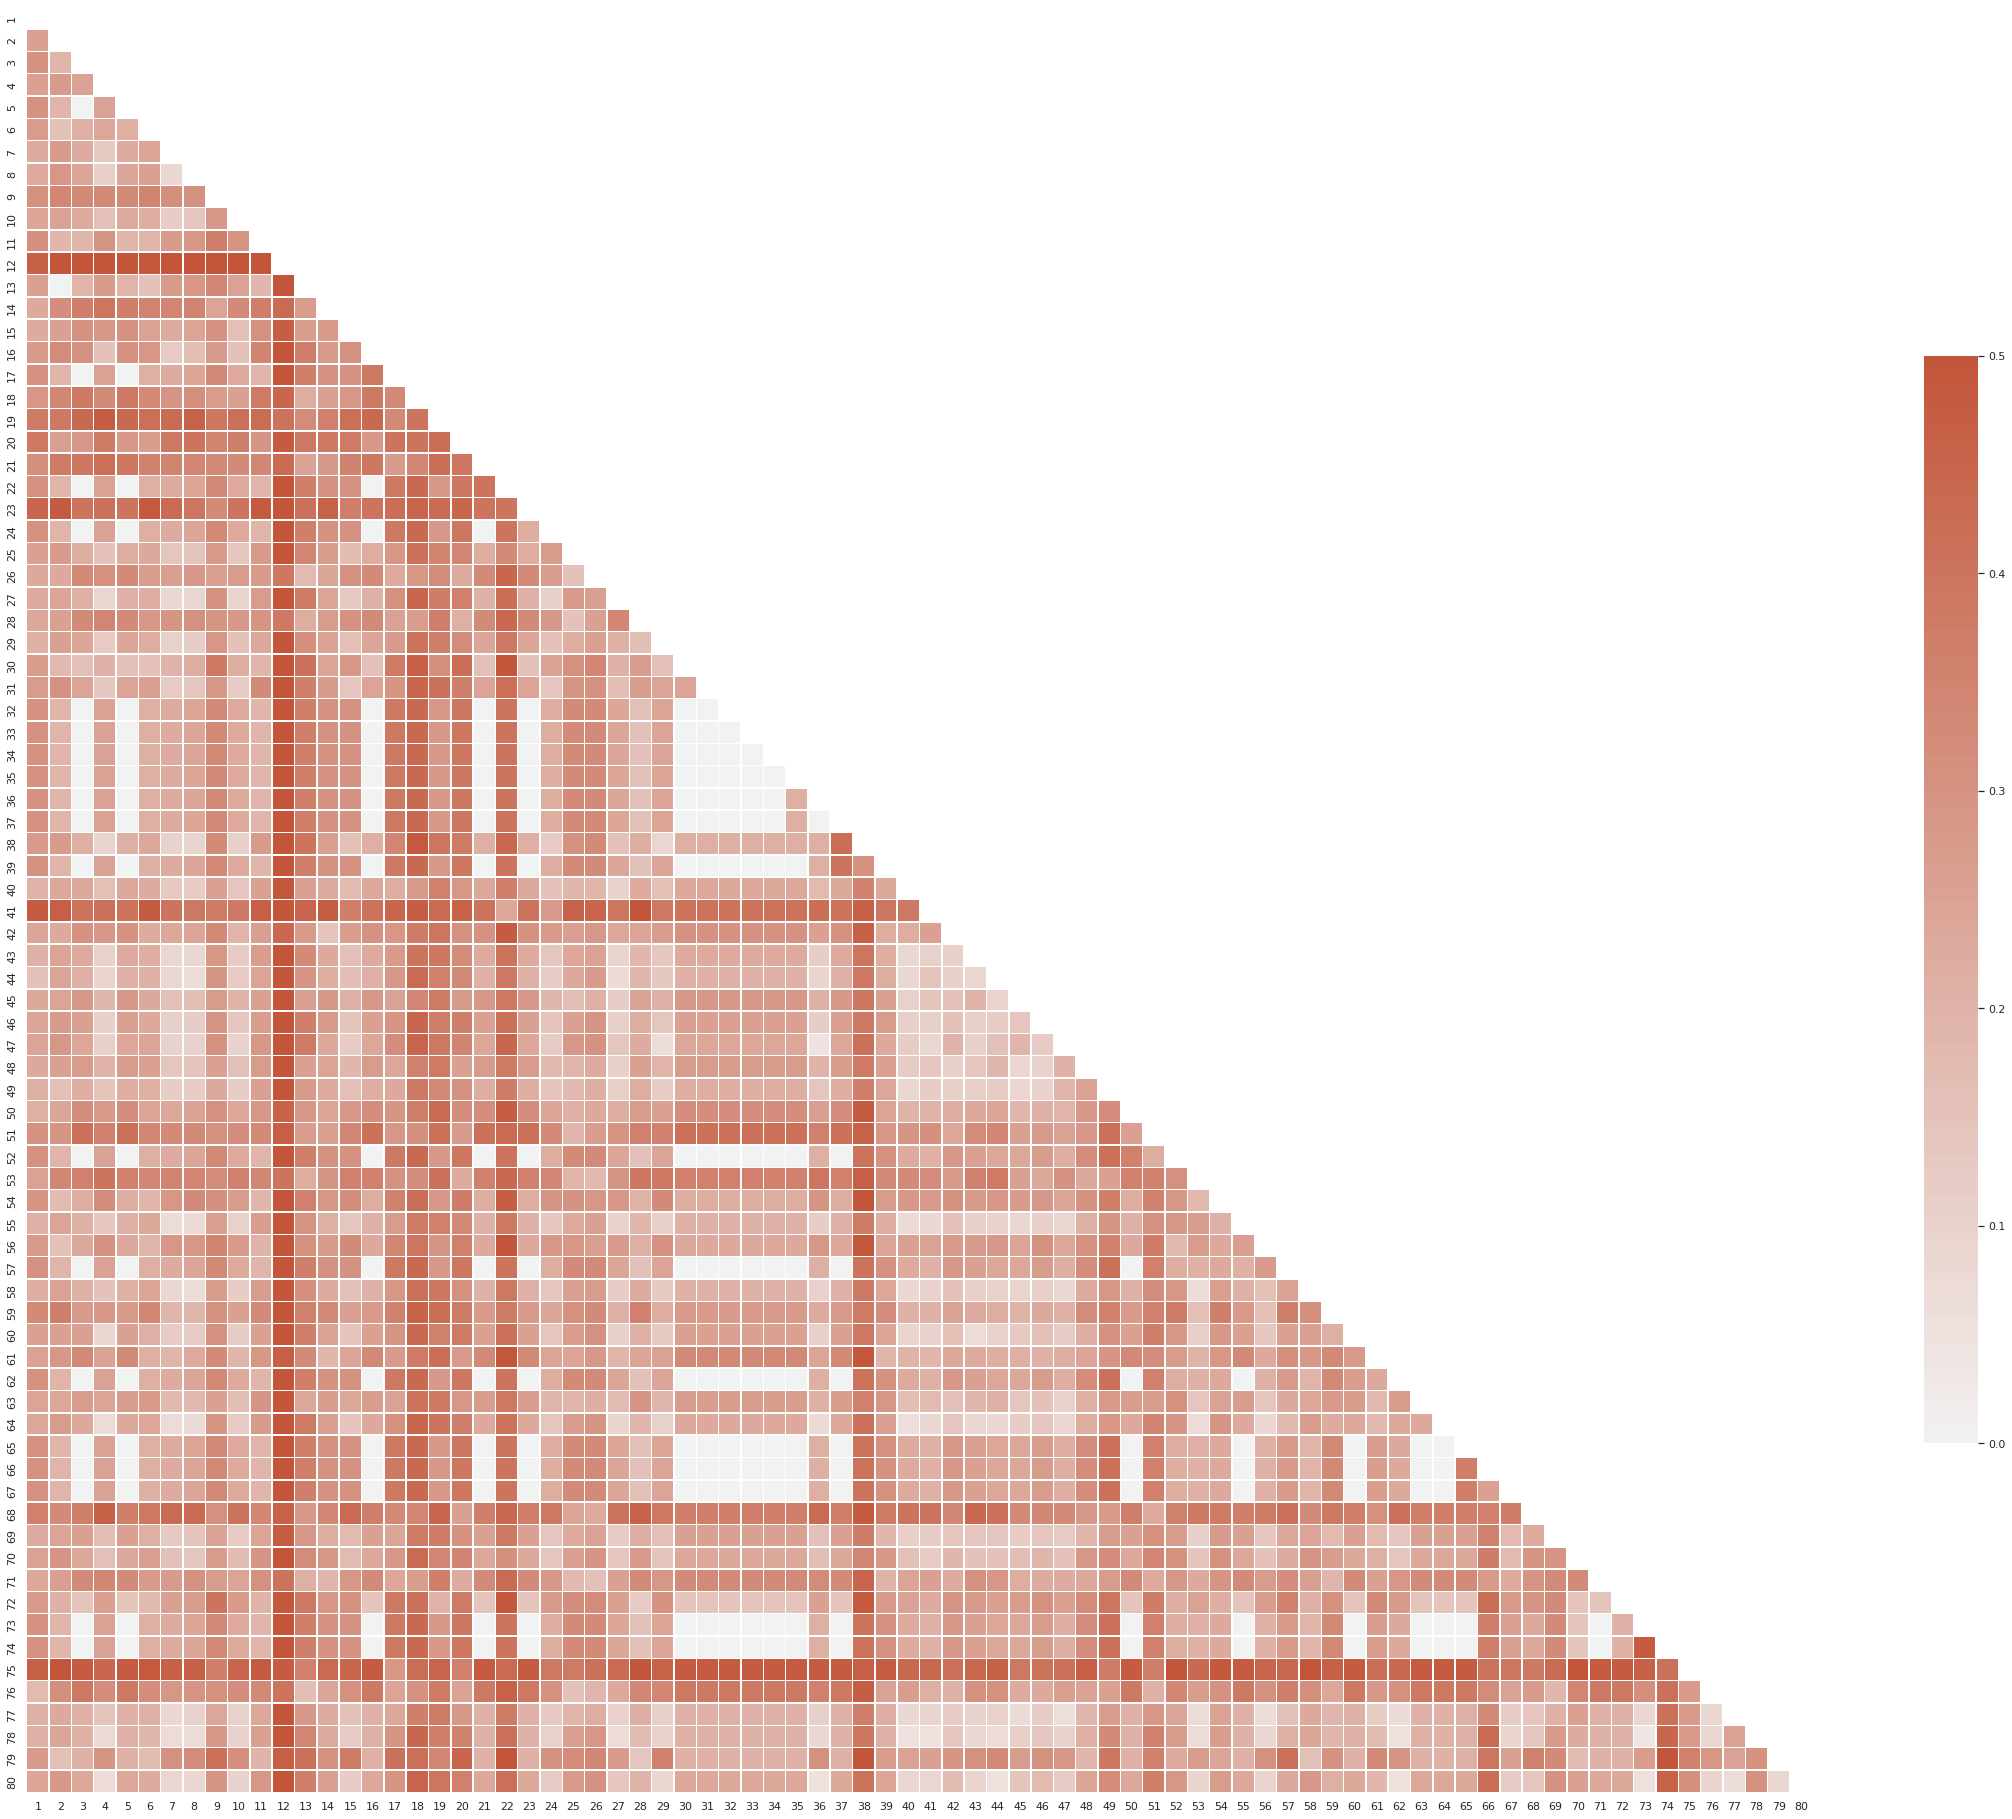

In [ ]:
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="white")

d = pd.DataFrame(data=DisBert,
                 index = list(range(1, 81)),
                 columns=list(range(1, 81)))

d.to_csv('./RDM.csv', index=False, header=False)

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(d, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(40, 40))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(d, mask=mask, cmap=cmap, vmax=0.5, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [ ]:
eng[4]

'pliers'

In [ ]:
eng[3]

'needle'

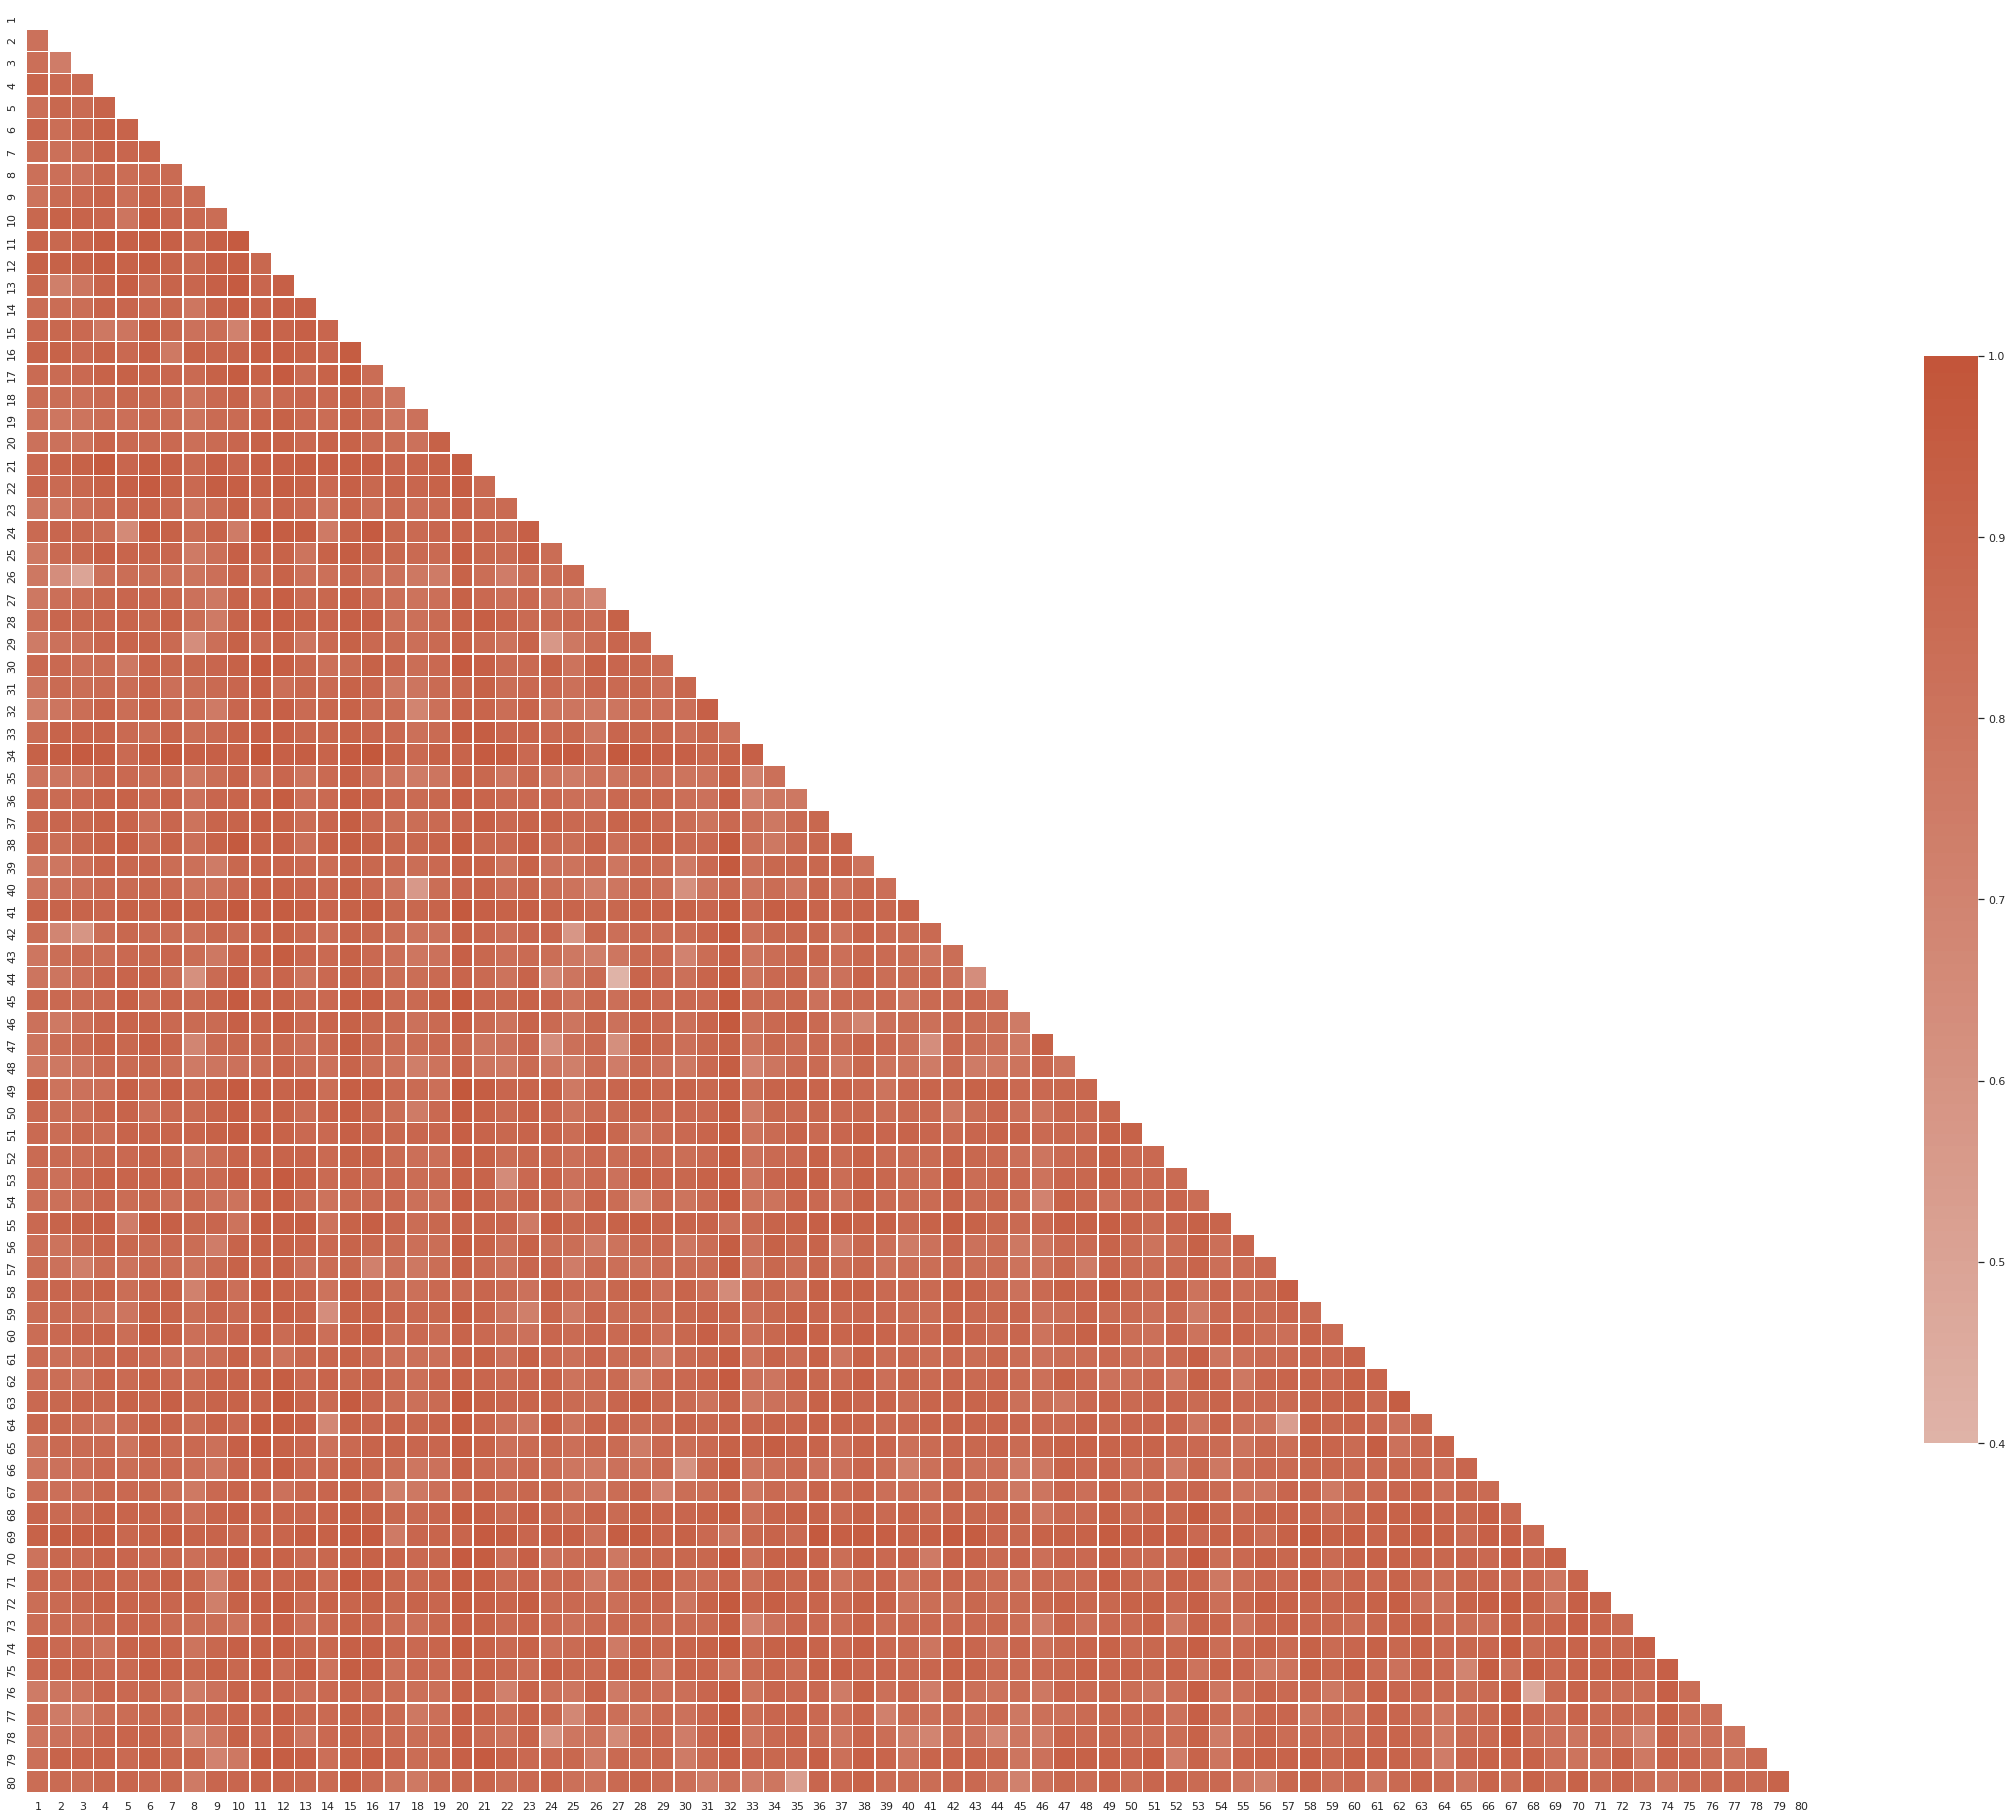

In [ ]:
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="white")

d = pd.DataFrame(data=DisFeat,
                 index = list(range(1, 81)),
                 columns=list(range(1, 81)))

d.to_csv('./RDM.csv', index=False, header=False)

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(d, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(40, 40))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(d, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [ ]:
from numpy import genfromtxt
conv1 = genfromtxt('/content/drive/MyDrive/behavioral_data/ResNet50/conv1.csv', delimiter=',')
bn1 = genfromtxt('/content/drive/MyDrive/behavioral_data/ResNet50/bn1.csv', delimiter=',')
avgpool = genfromtxt('/content/drive/MyDrive/behavioral_data/ResNet50/avgpool.csv', delimiter=',')
relu = genfromtxt('/content/drive/MyDrive/behavioral_data/ResNet50/relu.csv', delimiter=',')
layer1 = genfromtxt('/content/drive/MyDrive/behavioral_data/ResNet50/layer1.csv', delimiter=',')
layer2 = genfromtxt('/content/drive/MyDrive/behavioral_data/ResNet50/layer2.csv', delimiter=',')
layer3 = genfromtxt('/content/drive/MyDrive/behavioral_data/ResNet50/layer3.csv', delimiter=',')
layer4 = genfromtxt('/content/drive/MyDrive/behavioral_data/ResNet50/layer4.csv', delimiter=',')
maxpool =  genfromtxt('/content/drive/MyDrive/behavioral_data/ResNet50/maxpool.csv', delimiter=',')

In [ ]:
# RSA Bert and ResNet50

In [137]:
RSA_spearman(DisBert, conv1)

-0.003329237781159526

In [138]:
RSA_spearman(DisBert, bn1)

0.009601487589500367

In [139]:
RSA_spearman(DisBert, avgpool)

-0.013865081409932907

In [140]:
RSA_spearman(DisBert, relu)

0.007520648675013379

In [141]:
RSA_spearman(DisBert, layer1)

0.007575463129853649

In [142]:
RSA_spearman(DisBert, layer2)

-0.01306283845344165

In [143]:
RSA_spearman(DisBert, layer3)

-0.011551035927093858

In [144]:
RSA_spearman(DisBert, layer4)

-0.015154621926048686

In [145]:
RSA_spearman(DisBert, maxpool)

0.007267924660000984

In [ ]:
# fMRI behavioral
import scipy.io as sio
mat = sio.loadmat('/content/drive/MyDrive/behavioral_data/RDMsAll/allModelRDMsTogether.mat')

In [ ]:
item1 = mat.popitem()
item2 = mat.popitem()
item3 = mat.popitem()
item4 = mat.popitem()

In [ ]:
F_DL = item1[1][0][0][0]
F_DL.shape

(80, 80)

In [ ]:
M_DL = item1[1][0][1][0]
M_DL.shape

(80, 80)

In [ ]:
V_DL = item1[1][0][2][0]
V_DL.shape

(80, 80)

In [ ]:
F_Feats = item1[1][0][3][0]
F_Feats.shape

(80, 80)

In [ ]:
M_Feats = item1[1][0][4][0]
M_Feats.shape

(80, 80)

In [ ]:
V_Feats = item1[1][0][5][0]
V_Feats.shape

(80, 80)

In [ ]:
All_Feats = item1[1][0][6][0]
All_Feats.shape

(80, 80)

In [ ]:
FUN_IMDS = item1[1][0][7][0]
FUN_IMDS.shape

(80, 80)

In [ ]:
MAN_IMDS = item1[1][0][8][0]
MAN_IMDS.shape

(80, 80)

In [ ]:
VIS_IMDS = item1[1][0][9][0]
VIS_IMDS.shape

(80, 80)

In [ ]:
# RSA loaded behavioural data and Glove

In [146]:
RSA_spearman(DisBert, F_DL)

0.032600011997957104

In [147]:
RSA_spearman(DisBert, M_DL)

0.06482772905592782

In [148]:
RSA_spearman(DisBert, V_DL)

0.03485577645220915

In [149]:
RSA_spearman(DisBert, F_Feats)

0.060682940675503776

In [150]:
RSA_spearman(DisBert, M_Feats)

0.022485188063975023

In [151]:
RSA_spearman(DisBert, V_Feats)

0.0984362353479307

In [152]:
RSA_spearman(DisBert, All_Feats)

0.1379752825013999

In [153]:
RSA_spearman(DisBert, FUN_IMDS)

0.017511603927827708

In [154]:
RSA_spearman(DisBert, MAN_IMDS)

0.0604509570424277

In [155]:
RSA_spearman(DisBert, VIS_IMDS)

0.045922671733801344

In [ ]:
# end

In [ ]:
d = pd.DataFrame(data=DisFeat,
                 index = list(range(1, 81)),
                 columns=list(range(1, 81)))

d.to_csv('/content/drive/MyDrive/behavioral_data/RDMsAll/DisFeat.csv', index=False, header=False)

In [156]:
d = pd.DataFrame(data=DisBert,
                 index = list(range(1, 81)),
                 columns=list(range(1, 81)))

d.to_csv('/content/drive/MyDrive/behavioral_data/RDMsAll/DisBert.csv', index=False, header=False)

In [ ]:
# test for features and for Glove also

In [ ]:
import gensim.downloader as api

# load one of the Glove pretrained models
word_vectors = api.load("glove-wiki-gigaword-200")

[==================================================] 100.0% 252.1/252.1MB downloaded


In [ ]:
SimDisObjPortGlove = []
for subset in itertools.permutations(list(features['Object Name'].unique()), 2):
  if str(subset[0]) != 'nan' and str(subset[1]) != 'nan' \
  and subset[0] != 'pencil ' and subset[1] != 'pencil ' and subset[0] != 'scissors ' and subset[1] != 'scissors ':
    dictOfSimDis = {}
    if '/' in subset[0]:  
      dictOfSimDis['obj1'] = subset[0].split('/')[0].lower().strip().split('_')
      dictOfSimDis['obj2'] = subset[1].lower().strip().split('_')
      dictOfSimDis['dissim'] = 1 - word_vectors.n_similarity(dictOfSimDis['obj1'], dictOfSimDis['obj2'])
    elif '/' in subset[1]:
      dictOfSimDis['obj1'] = subset[0].lower().strip().split('_')
      dictOfSimDis['obj2'] = subset[1].split('/')[0].lower().strip().split('_')
      dictOfSimDis['dissim'] = 1 - word_vectors.n_similarity(dictOfSimDis['obj1'], dictOfSimDis['obj2'])
    else:
      dictOfSimDis['obj1'] = subset[0].lower().strip().split('_')
      dictOfSimDis['obj2'] = subset[1].lower().strip().split('_')
      dictOfSimDis['dissim'] = 1 - word_vectors.n_similarity(dictOfSimDis['obj1'], dictOfSimDis['obj2'])

    EngFeat1 = features[features['Object Name'] == subset[0]]['English feature '].unique()
    EngFeat2 = features[features['Object Name'] == subset[1]]['English feature '].unique()
    dissimilarities1 = list(set(EngFeat1) - set(EngFeat2))
    dissimilarities2 = list(set(EngFeat2) - set(EngFeat1))
    similarities = list(set(EngFeat1) & set(EngFeat2))
    lenDis1 = len(dissimilarities1)
    lenDis2 = len(dissimilarities2)
    lenSim = len(similarities)

    dictOfSimDis['dis1'] = dissimilarities1
    dictOfSimDis['dis2'] = dissimilarities2
    dictOfSimDis['sim'] = similarities
    dictOfSimDis['lenDis1'] = lenDis1
    dictOfSimDis['lenDis2'] = lenDis2
    dictOfSimDis['lenSim'] = lenSim
    dictOfSimDis['portName1'] = features[features['Object Name'] == subset[0]]['Portuguese ObjNam'].unique()
    dictOfSimDis['portName2'] = features[features['Object Name'] == subset[1]]['Portuguese ObjNam'].unique()

    SimDisObjPortGlove.append(dictOfSimDis)

In [ ]:
DisGlove = np.empty([len(sortedList), len(sortedList)])

i = 0
j = 0
for e in sortedList:
  for item in SimDisObjPortGlove:
    if i == j:
        DisGlove[i, j] = 0 
        j = j + 1
    elif item['obj1'] == e:
        similarity = word_vectors.n_similarity(item['obj1'], item['obj2'])  
        DisGlove[i, j] = 1 - similarity
        j = j + 1
  j = 0
  i = i + 1

In [ ]:
# glove and bert
RSA_spearman(DisBert, DisGlove)

0.12392437042315502

In [ ]:
d = pd.DataFrame(data=DisGlove,
                 index = list(range(1, 81)),
                 columns=list(range(1, 81)))

d.to_csv('/content/drive/MyDrive/behavioral_data/RDMsAll/DisGlove.csv', index=False, header=False)

In [ ]:
# let's try for action also

In [ ]:
actions['Portuguese ObjNam'] = actions['Object Name'] 
actions = actions.replace({"Portuguese ObjNam" : portDict})
actions = actions.sort_values(by=['Portuguese ObjNam'])
actions.head()

,Object Name,Portuguese feature,English feature,Production frequency,Concepts per Feature (CPF),Disting,Distinct,Portuguese ObjNam
628,opener_bottle,movimento_do_pulso,wrist_movement,3.0,15.0,ND,0.066667,abre_caricas
637,opener_bottle,usado_com_uma_mão,used_by_one_hand,22.0,75.0,ND,0.013333,abre_caricas
635,opener_bottle,uma_mão_agarra_o_objecto_complementar,one_hand_grasps_the_complementary_object,3.0,7.0,ND,0.142857,abre_caricas
634,opener_bottle,requer_força,requires_strenght,17.0,73.0,ND,0.013699,abre_caricas
633,opener_bottle,movimento_único,single_movement,2.0,2.0,D,0.500000,abre_caricas


In [ ]:
SimDisPortAct = []
for subset in itertools.permutations(list(actions['Object Name'].unique()), 2):
  if str(subset[0]) != 'nan' and str(subset[1]) != 'nan' \
  and subset[0] != 'bucket ' and subset[1] != 'bucket ' and subset[0] != 'bottle ' and subset[1] != 'bottle ':
    dictOfSimDis = {}
    if '/' in subset[0]:  
      dictOfSimDis['obj1'] = subset[0].split('/')[0].lower().strip().split('_')
      dictOfSimDis['obj2'] = subset[1].lower().strip().split('_')

      obj1 = tokenizer.encode(dictOfSimDis['obj1'], add_special_tokens=True)
      obj1 = torch.tensor([obj1])
      with torch.no_grad():
        lhs1 = model(obj1)[0] # Models outputs are now tuples
        lhs1 = lhs1.mean(1)

      obj2 = tokenizer.encode(dictOfSimDis['obj2'], add_special_tokens=True)
      obj2 = torch.tensor([obj2])
      with torch.no_grad():
        lhs2 = model(obj2)[0] # Models outputs are now tuples
        lhs2 = lhs2.mean(1)
    elif '/' in subset[1]:
      dictOfSimDis['obj1'] = subset[0].lower().strip().split('_')
      dictOfSimDis['obj2'] = subset[1].split('/')[0].lower().strip().split('_')

      obj1 = tokenizer.encode(dictOfSimDis['obj1'], add_special_tokens=True)
      obj1 = torch.tensor([obj1])
      with torch.no_grad():
        lhs1 = model(obj1)[0] # Models outputs are now tuples
        lhs1 = lhs1.mean(1)

      obj2 = tokenizer.encode(dictOfSimDis['obj2'], add_special_tokens=True)
      obj2 = torch.tensor([obj2])
      with torch.no_grad():
        lhs2 = model(obj2)[0] # Models outputs are now tuples
        lhs2 = lhs2.mean(1)

      dictOfSimDis['dissim'] = 1 - cosine_similarity(lhs1,lhs2)
    else:
      dictOfSimDis['obj1'] = subset[0].lower().strip().split('_')
      dictOfSimDis['obj2'] = subset[1].lower().strip().split('_')

      obj1 = tokenizer.encode(dictOfSimDis['obj1'], add_special_tokens=True)
      obj1 = torch.tensor([obj1])
      with torch.no_grad():
        lhs1 = model(obj1)[0] # Models outputs are now tuples
        lhs1 = lhs1.mean(1)

      obj2 = tokenizer.encode(dictOfSimDis['obj2'], add_special_tokens=True)
      obj2 = torch.tensor([obj2])
      with torch.no_grad():
        lhs2 = model(obj2)[0] # Models outputs are now tuples
        lhs2 = lhs2.mean(1)

      dictOfSimDis['dissim'] = 1 - cosine_similarity(lhs1,lhs2)

    EngFeat1 = actions[actions['Object Name'] == subset[0]]['English feature '].unique()
    EngFeat2 = actions[actions['Object Name'] == subset[1]]['English feature '].unique()
    dissimilarities1 = list(set(EngFeat1) - set(EngFeat2))
    dissimilarities2 = list(set(EngFeat2) - set(EngFeat1))
    similarities = list(set(EngFeat1) & set(EngFeat2))
    lenDis1 = len(dissimilarities1)
    lenDis2 = len(dissimilarities2)
    lenSim = len(similarities)

    dictOfSimDis['dis1'] = dissimilarities1
    dictOfSimDis['dis2'] = dissimilarities2
    dictOfSimDis['sim'] = similarities
    dictOfSimDis['lenDis1'] = lenDis1
    dictOfSimDis['lenDis2'] = lenDis2
    dictOfSimDis['lenSim'] = lenSim
    dictOfSimDis['portName1'] = features[features['Object Name'] == subset[0]]['Portuguese ObjNam'].unique()
    dictOfSimDis['portName2'] = features[features['Object Name'] == subset[1]]['Portuguese ObjNam'].unique()

    SimDisPortAct.append(dictOfSimDis)

In [ ]:
import pickle
with open('/content/drive/MyDrive/behavioral_data/SimDisPortActBert.pickle', 'wb') as fout:
    pickle.dump(SimDisPortAct, fout)

In [ ]:
DisBertAct = np.empty([len(sortedList), len(sortedList)])

i = 0
j = 0
for e in sortedList:
  for item in SimDisPortAct:
    if i == j:
        DisBertAct[i, j] = 0 
        j = j + 1
    elif item['obj1'] == e:

      obj1 = tokenizer.encode(item['obj1'], add_special_tokens=True)
      obj1 = torch.tensor([obj1])
      with torch.no_grad():
        lhs1 = model(obj1)[0] # Models outputs are now tuples
        lhs1 = lhs1.mean(1)

      obj2 = tokenizer.encode(item['obj2'], add_special_tokens=True)
      obj2 = torch.tensor([obj2])
      with torch.no_grad():
        lhs2 = model(obj2)[0] # Models outputs are now tuples
        lhs2 = lhs2.mean(1)
        
      DisBertAct[i, j] = 1 - cosine_similarity(lhs1,lhs2)
      j = j + 1
  
  j = 0
  i = i + 1

In [98]:
RSA_spearman(DisBertAct, DisFeat)

0.07411290979907179

In [99]:
RSA_spearman(DisBertAct, DisBert)

0.6092021667088547

In [100]:
RSA_spearman(DisBertAct, conv1)

-0.020873613997545712

In [101]:
RSA_spearman(DisBertAct, bn1)

-0.006992524244833195

In [102]:
RSA_spearman(DisBertAct, avgpool)

-0.0003715312571669716

In [103]:
RSA_spearman(DisBertAct, relu)

-0.01090836007248625

In [104]:
RSA_spearman(DisBertAct, layer1)

0.0014172843101841746

In [105]:
RSA_spearman(DisBertAct, layer2)

0.00273245249490774

In [106]:
RSA_spearman(DisBertAct, layer3)

0.0005362883761984673

In [107]:
RSA_spearman(DisBertAct, layer4)

-0.0010668686314380864

In [108]:
RSA_spearman(DisBertAct, maxpool)

-0.0009275836337202044

In [119]:
RSA_spearman(DisBertAct, F_DL)

0.03488122677135588

In [120]:
RSA_spearman(DisBertAct, M_DL)

0.04850275938589932

In [121]:
RSA_spearman(DisBertAct, V_DL)

0.05920548339862772

In [122]:
RSA_spearman(DisBertAct, F_Feats)

0.053943429675228576

In [123]:
RSA_spearman(DisBertAct, M_Feats)

0.07582967142074946

In [124]:
RSA_spearman(DisBertAct, V_Feats)

0.0685675289203772

In [125]:
RSA_spearman(DisBertAct, All_Feats)

0.09880846324899165

In [126]:
RSA_spearman(DisBertAct, FUN_IMDS)

0.09357202801134552

In [127]:
RSA_spearman(DisBertAct, MAN_IMDS)

0.026518796147816333

In [128]:
RSA_spearman(DisBertAct, VIS_IMDS)

0.056848308934754614

In [129]:
d = pd.DataFrame(data=DisBertAct,
                 index = list(range(1, 81)),
                 columns=list(range(1, 81)))

d.to_csv('/content/drive/MyDrive/behavioral_data/RDMsAll/DisBertAct.csv', index=False, header=False)

In [157]:
# Action glove

In [158]:
SimDisPortActGlove = []
for subset in itertools.permutations(list(actions['Object Name'].unique()), 2):
  if str(subset[0]) != 'nan' and str(subset[1]) != 'nan' \
  and subset[0] != 'bucket ' and subset[1] != 'bucket ' and subset[0] != 'bottle ' and subset[1] != 'bottle ':
    dictOfSimDis = {}
    if '/' in subset[0]:  
      dictOfSimDis['obj1'] = subset[0].split('/')[0].lower().strip().split('_')
      dictOfSimDis['obj2'] = subset[1].lower().strip().split('_')
      dictOfSimDis['dissim'] = 1 - word_vectors.n_similarity(dictOfSimDis['obj1'], dictOfSimDis['obj2'])
    elif '/' in subset[1]:
      dictOfSimDis['obj1'] = subset[0].lower().strip().split('_')
      dictOfSimDis['obj2'] = subset[1].split('/')[0].lower().strip().split('_')
      dictOfSimDis['dissim'] = 1 - word_vectors.n_similarity(dictOfSimDis['obj1'], dictOfSimDis['obj2'])
    else:
      dictOfSimDis['obj1'] = subset[0].lower().strip().split('_')
      dictOfSimDis['obj2'] = subset[1].lower().strip().split('_')
      dictOfSimDis['dissim'] = 1 - word_vectors.n_similarity(dictOfSimDis['obj1'], dictOfSimDis['obj2'])

    EngFeat1 = actions[actions['Object Name'] == subset[0]]['English feature '].unique()
    EngFeat2 = actions[actions['Object Name'] == subset[1]]['English feature '].unique()
    dissimilarities1 = list(set(EngFeat1) - set(EngFeat2))
    dissimilarities2 = list(set(EngFeat2) - set(EngFeat1))
    similarities = list(set(EngFeat1) & set(EngFeat2))
    lenDis1 = len(dissimilarities1)
    lenDis2 = len(dissimilarities2)
    lenSim = len(similarities)

    dictOfSimDis['dis1'] = dissimilarities1
    dictOfSimDis['dis2'] = dissimilarities2
    dictOfSimDis['sim'] = similarities
    dictOfSimDis['lenDis1'] = lenDis1
    dictOfSimDis['lenDis2'] = lenDis2
    dictOfSimDis['lenSim'] = lenSim
    dictOfSimDis['portName1'] = features[features['Object Name'] == subset[0]]['Portuguese ObjNam'].unique()
    dictOfSimDis['portName2'] = features[features['Object Name'] == subset[1]]['Portuguese ObjNam'].unique()

    SimDisPortActGlove.append(dictOfSimDis)

In [159]:
DisFeatAct = np.empty([len(sortedList), len(sortedList)])

i = 0
j = 0
for e in sortedList:
  for item in SimDisPortActGlove:
    if i == j:
        DisFeatAct[i, j] = 0 
        j = j + 1
    elif item['obj1'] == e:
        DisFeatAct[i, j] = 1 - (item['lenSim'] / (item['lenSim'] + item['lenDis1'] + item['lenDis2']))
        j = j + 1
  j = 0
  i = i + 1

In [160]:
DisGloveAct = np.empty([len(sortedList), len(sortedList)])

i = 0
j = 0
for e in sortedList:
  for item in SimDisPortActGlove:
    if i == j:
        DisGloveAct[i, j] = 0 
        j = j + 1
    elif item['obj1'] == e:
        similarity = word_vectors.n_similarity(item['obj1'], item['obj2'])  
        DisGloveAct[i, j] = 1 - similarity
        j = j + 1
  j = 0
  i = i + 1

In [162]:
def namestr(obj, namespace):
    return [name for name in namespace if namespace[name] is obj]
l1 = [F_DL, M_DL, V_DL, F_Feats, M_Feats, V_Feats, All_Feats, VIS_IMDS, FUN_IMDS, MAN_IMDS]
l2 = [conv1, bn1, avgpool, relu, maxpool, layer1, layer2, layer3, layer4]
# for e1 in l1:
#   for e2 in l2:
#     rsa = RSA_spearman(e1, e2)
#     print('RSA of ', namestr(e1, globals())[-2], ' and ', namestr(e2, globals())[-2], ' = ', rsa)

In [163]:
l3 = [DisFeatAct, DisGloveAct]
for e1 in l1:
  for e3 in l3:
    rsa = RSA_spearman(e1, e3)
    print('RSA of ', namestr(e1, globals())[-2], ' and ', namestr(e3, globals())[-2], ' = ', rsa)

RSA of  F_DL  and  DisFeatAct  =  -0.030873006722328095
RSA of  F_DL  and  DisGloveAct  =  0.08889450679819456
RSA of  M_DL  and  DisFeatAct  =  0.044758949194219334
RSA of  M_DL  and  DisGloveAct  =  0.056075495362075435
RSA of  V_DL  and  DisFeatAct  =  0.03173900350840908
RSA of  V_DL  and  DisGloveAct  =  0.07468198136279713
RSA of  F_Feats  and  DisFeatAct  =  0.030385016572489525
RSA of  F_Feats  and  DisGloveAct  =  0.11124141346462604
RSA of  M_Feats  and  DisFeatAct  =  0.08908603243917024
RSA of  M_Feats  and  DisGloveAct  =  -0.008575954218626534
RSA of  V_Feats  and  DisFeatAct  =  0.050759259413759854
RSA of  V_Feats  and  DisGloveAct  =  0.018908151074971062
RSA of  All_Feats  and  DisFeatAct  =  0.009153391277886143
RSA of  All_Feats  and  DisGloveAct  =  0.06539523569185608
RSA of  VIS_IMDS  and  DisFeatAct  =  0.04046926398860663
RSA of  VIS_IMDS  and  DisGloveAct  =  0.011184432625498704
RSA of  FUN_IMDS  and  DisFeatAct  =  -0.04980276372003858
RSA of  FUN_IMDS  and 

In [164]:
d = pd.DataFrame(data=DisGloveAct,
                 index = list(range(1, 81)),
                 columns=list(range(1, 81)))

d.to_csv('/content/drive/MyDrive/behavioral_data/RDMsAll/DisGloveAct.csv', index=False, header=False)

In [165]:
d = pd.DataFrame(data=DisFeatAct,
                 index = list(range(1, 81)),
                 columns=list(range(1, 81)))

d.to_csv('/content/drive/MyDrive/behavioral_data/RDMsAll/DisFeatAct.csv', index=False, header=False)